In [24]:
"""
    https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
    
    Dataset, DataLoader 등에 대해 정리 
    
    Dataset - sample과 해당하는 label 저장하는 객체
    DataLoder - dataset을 활용하여 데이터를 Loading 하는 utility (batching, shuffling 등을 수행)
"""

'\n    https://pytorch.org/tutorials/beginner/basics/data_tutorial.html\n    \n    Dataset, DataLoader 등에 대해 정리 \n    \n    Dataset - sample과 해당하는 label 저장하는 객체\n    DataLoder - \n'

In [25]:
"""
    미리 구현된 FashineMNIST를 활용하여 dataset 불러오기 
"""
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
root="./data/",
train=True,
download=True,
transform = ToTensor())

In [40]:
features,labels = training_data[0]
print(type(features))
print(features.shape)

<class 'torch.Tensor'>
torch.Size([1, 28, 28])


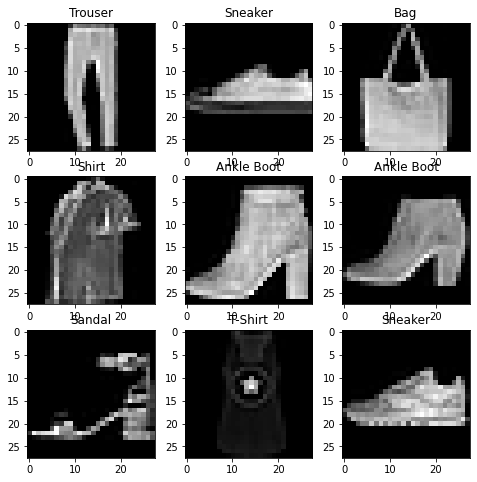

In [23]:
"""
    map-style datasets으로부터 데이터 불러오는 예시
"""

from random import randint
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8)) # 최초 창의 크기를 설정
cols, rows = 3,3
for i in range(1,cols*rows+1):
    sample_idx = randint(0,len(training_data))
    img, label = training_data[sample_idx]
    sub_fig = figure.add_subplot(rows,cols,i)
    sub_fig.set_title(labels_map[label])
    sub_fig.imshow(img.squeeze(),cmap='gray') # img shape 1,28,28 -> 28,28로만듬
    
plt.show()

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])


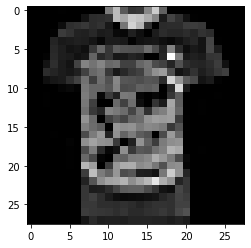

In [45]:
"""
    DataLoader 활용하여 학습 데이터 불러오기
"""
from torch.utils.data import DataLoader

# DataLoader 생성 시 Dataset을 입력받고 이를 활용하여 Batch를 생성함
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

train_features, train_labels=next(iter(train_dataloader))
print(type(train_features))
print(train_features.shape)
plt.imshow(train_features[0].squeeze(),cmap='gray') # batch의 1번째 이미지 그리기
plt.show()
